<a href="https://colab.research.google.com/github/Caracolys/Practicing-AI-with-Python/blob/main/Practicing_Perceptron_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios

# **Aluna: Carolina Dubezkyj Quintana**




Aplicar o Perceptron e MLP para os casos a seguir.
Experimente diferentes configurações de hiperparâmetros.
Visualize a acurácia ao final do modelo.
Visualize a matriz de confusão para os casos de classificação.

# Perceptron para OR, AND  e XOR

Aplicar o Perceptron para as portas lógicas OR, AND e XOR.

Reflita: Para quais portas lógicas o Perceptron é capaz de classificar corretamente os dados?

=== AVALIAÇÃO DO PERCEPTRON PARA PORTAS LÓGICAS ===

--- Porta OR ---
Precisão: 1.00
Saídas previstas: [0 1 1 1]
Saídas esperadas: [0 1 1 1]
Pesos: [[0.2 0.2]]
Bias: [-0.1]
Matriz de Confusão:
[[1 0]
 [0 3]]


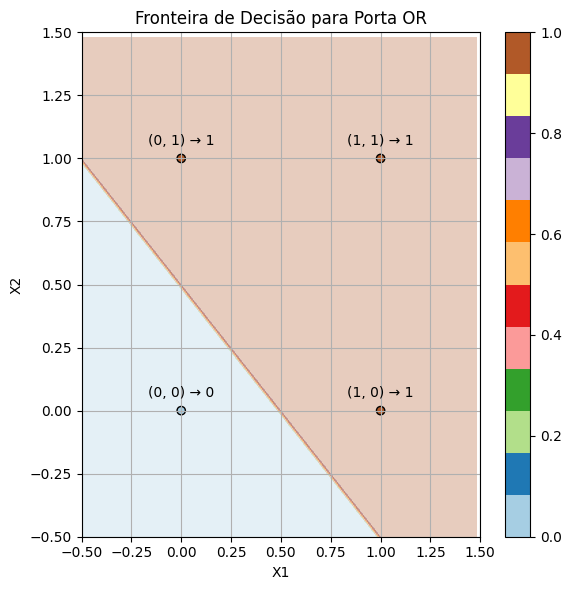


--- Porta AND ---
Precisão: 1.00
Saídas previstas: [0 0 0 1]
Saídas esperadas: [0 0 0 1]
Pesos: [[0.2 0.2]]
Bias: [-0.2]
Matriz de Confusão:
[[3 0]
 [0 1]]


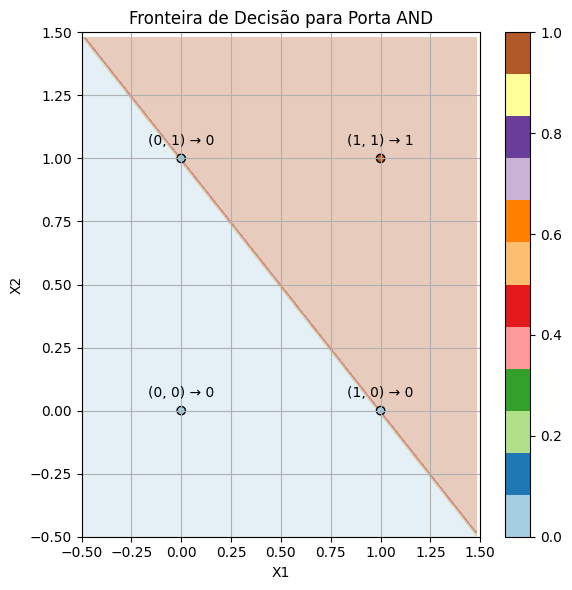


--- Porta XOR ---
Precisão: 0.50
Saídas previstas: [0 0 0 0]
Saídas esperadas: [0 1 1 0]
Pesos: [[0. 0.]]
Bias: [0.]
Matriz de Confusão:
[[2 0]
 [2 0]]


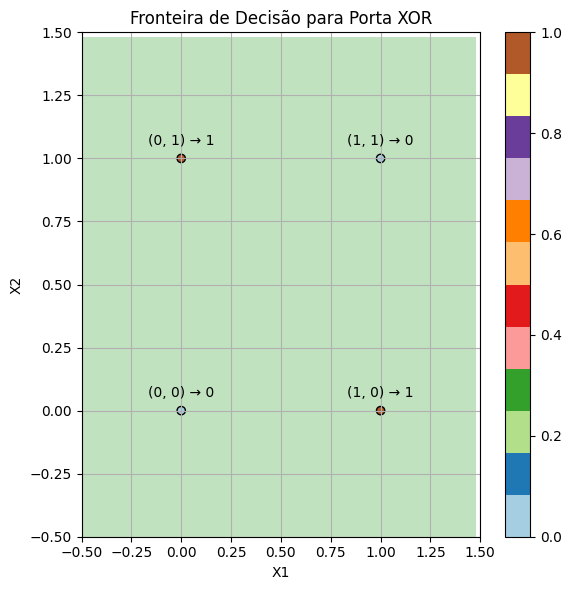


=== RESUMO DOS RESULTADOS ===
Acurácia para OR: 1.00
Acurácia para AND: 1.00
Acurácia para XOR: 0.50


In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

X_gates = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_or = np.array([0, 1, 1, 1])
y_and = np.array([0, 0, 0, 1])
y_xor = np.array([0, 1, 1, 0])

def train_and_evaluate_perceptron(X, y, gate_name):
    perceptron = Perceptron(
        max_iter=1000,
        eta0=0.1,
        random_state=42,
        shuffle=True,
        tol=1e-5
    )

    perceptron.fit(X, y)

    y_pred = perceptron.predict(X)

    accuracy = accuracy_score(y, y_pred)

    cm = confusion_matrix(y, y_pred)

    print(f"\n--- Porta {gate_name.upper()} ---")
    print(f"Precisão: {accuracy:.2f}")
    print(f"Saídas previstas: {y_pred}")
    print(f"Saídas esperadas: {y}")
    print(f"Pesos: {perceptron.coef_}")
    print(f"Bias: {perceptron.intercept_}")
    print("Matriz de Confusão:")
    print(cm)

    plot_decision_boundary(perceptron, X, y, gate_name)

    return accuracy, perceptron

def plot_decision_boundary(model, X, y, gate_name):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    for i, (x_val, y_val) in enumerate(X):
        plt.annotate(f'({x_val}, {y_val}) → {y[i]}',
                     (x_val, y_val),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Fronteira de Decisão para Porta {gate_name.upper()}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

print("=== AVALIAÇÃO DO PERCEPTRON PARA PORTAS LÓGICAS ===")
acc_or, model_or = train_and_evaluate_perceptron(X_gates, y_or, "OR")
acc_and, model_and = train_and_evaluate_perceptron(X_gates, y_and, "AND")
acc_xor, model_xor = train_and_evaluate_perceptron(X_gates, y_xor, "XOR")

print("\n=== RESUMO DOS RESULTADOS ===")
print(f"Acurácia para OR: {acc_or:.2f}")
print(f"Acurácia para AND: {acc_and:.2f}")
print(f"Acurácia para XOR: {acc_xor:.2f}")

# MLP para as portas lógicas OR, AND e XOR

Aplicar o MLP para as portas lógicas OR, AND e XOR.

Reflita: Para quais portas lógicas o MLP é capaz de classificar corretamente os dados?

--- Perceptron para a porta lógica OR ---
Acurácia: 1.0
Matriz de Confusão:
[[1 0]
 [0 3]]


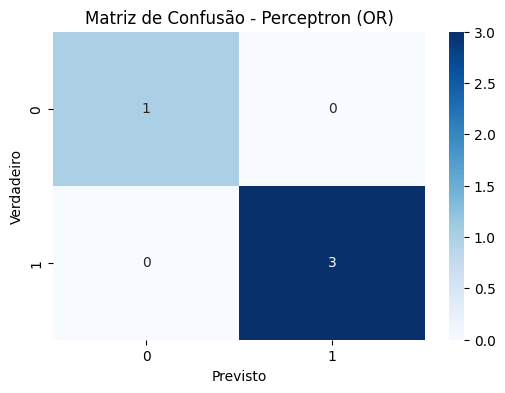

-------------------------------------
--- Perceptron para a porta lógica AND ---
Acurácia: 1.0
Matriz de Confusão:
[[3 0]
 [0 1]]


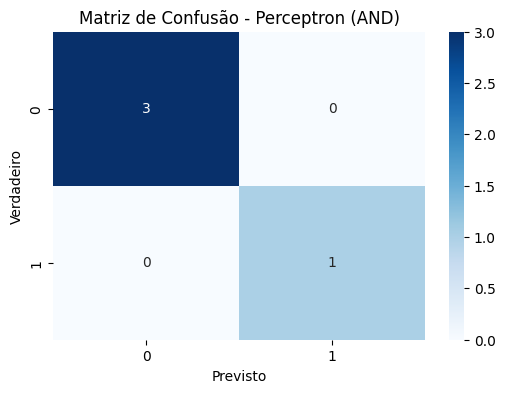

--------------------------------------
--- Perceptron para a porta lógica XOR ---
Acurácia: 0.5
Matriz de Confusão:
[[2 0]
 [2 0]]


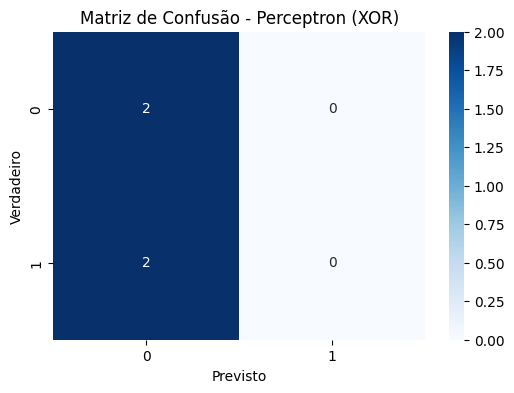

--------------------------------------
--- MLP para a porta lógica OR (Hidden Layers: (2,)) ---
Acurácia: 1.0
Matriz de Confusão:
[[1 0]
 [0 3]]


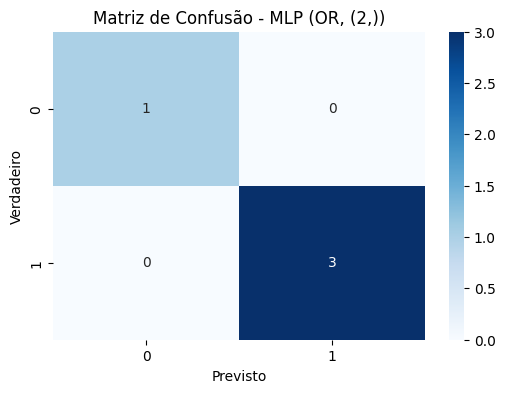

-------------------------------------
--- MLP para a porta lógica OR (Hidden Layers: (4, 2)) ---
Acurácia: 1.0
Matriz de Confusão:
[[1 0]
 [0 3]]


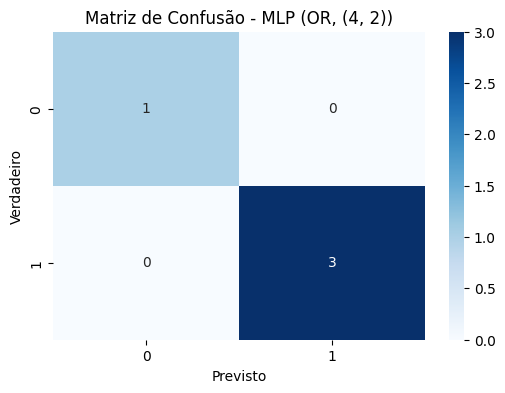

-------------------------------------
--- MLP para a porta lógica AND (Hidden Layers: (2,)) ---
Acurácia: 1.0
Matriz de Confusão:
[[3 0]
 [0 1]]


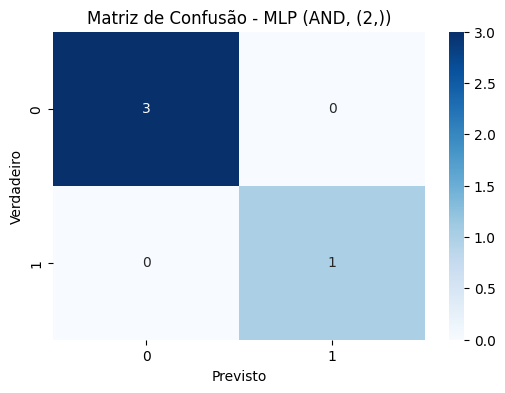

--------------------------------------
--- MLP para a porta lógica AND (Hidden Layers: (4, 2)) ---
Acurácia: 1.0
Matriz de Confusão:
[[3 0]
 [0 1]]


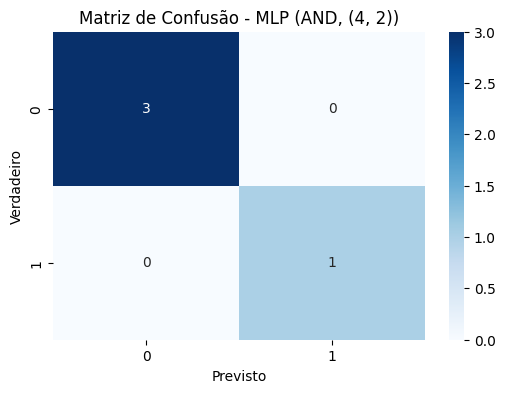

--------------------------------------
--- MLP para a porta lógica XOR (Hidden Layers: (2,)) ---
Acurácia: 0.5
Matriz de Confusão:
[[0 2]
 [0 2]]


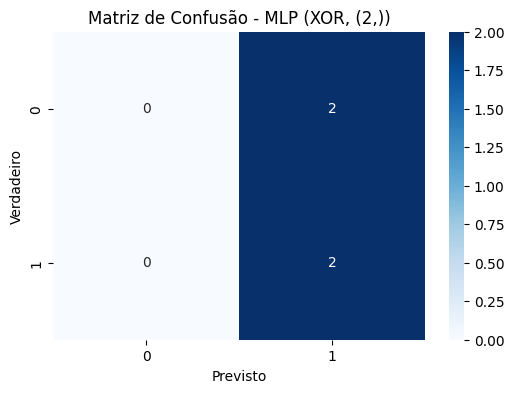

--------------------------------------
--- MLP para a porta lógica XOR (Hidden Layers: (4, 2)) ---
Acurácia: 0.5
Matriz de Confusão:
[[2 0]
 [2 0]]


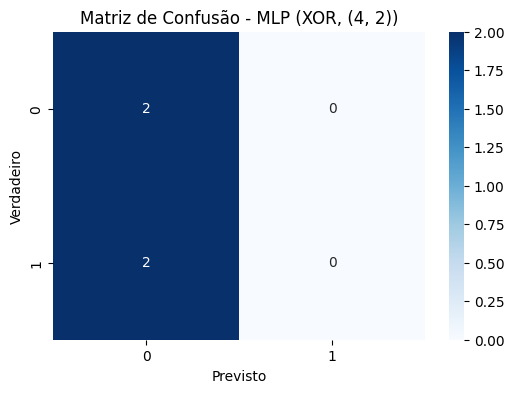

--------------------------------------


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Dados para a porta lógica XOR
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

def run_perceptron(X, y, gate_name):
    print(f"--- Perceptron para a porta lógica {gate_name} ---")

    perceptron = Perceptron(random_state=42)
    perceptron.fit(X, y)
    y_pred = perceptron.predict(X)

    accuracy = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)

    print(f"Acurácia: {accuracy}")
    print("Matriz de Confusão:")
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - Perceptron ({gate_name})')
    plt.show()

    print("-" * (len(gate_name) + 35))

run_perceptron(X_or, y_or, "OR")
run_perceptron(X_and, y_and, "AND")
run_perceptron(X_xor, y_xor, "XOR")

def run_mlp(X, y, gate_name, hidden_layer_sizes):
    print(f"--- MLP para a porta lógica {gate_name} (Hidden Layers: {hidden_layer_sizes}) ---")

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=10000, random_state=42)
    mlp.fit(X, y)
    y_pred = mlp.predict(X)

    accuracy = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)

    print(f"Acurácia: {accuracy}")
    print("Matriz de Confusão:")
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - MLP ({gate_name}, {hidden_layer_sizes})')
    plt.show()

    print("-" * (len(gate_name) + 35))

run_mlp(X_or, y_or, "OR", (2,))
run_mlp(X_or, y_or, "OR", (4, 2))

run_mlp(X_and, y_and, "AND", (2,))
run_mlp(X_and, y_and, "AND", (4, 2))

run_mlp(X_xor, y_xor, "XOR", (2,))
run_mlp(X_xor, y_xor, "XOR", (4, 2))

## MLP - Data set Wine (Vinhos)

Atributos numéricos: o Wine Dataset possui atributos numéricos que representam características físico-químicas dos vinhos, como acidez, teor alcoólico, etc. Isso facilita o uso com o Perceptron, que opera com dados numéricos.

Classes bem definidas: O Wine Dataset possui 3 classes que representam diferentes tipos de vinhos. As classes são distintas e balanceadas, tornando o dataset adequado para tarefas de classificação.

Tamanho similar: O Wine Dataset possui 178 amostras.

Disponibilidade: O Wine Dataset está disponível no Scikit-learn, facilitando seu acesso e uso. Você pode carregá-lo com o seguinte código:


--- Aplicando Perceptron ao Wine Dataset ---
Acurácia do Perceptron: 0.5555555555555556


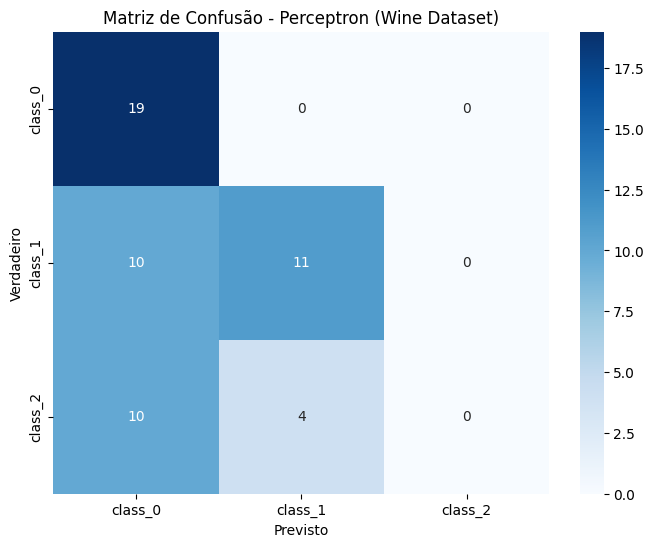

----------------------------------------
--- Aplicando MLP ao Wine Dataset ---

MLP com hidden_layer_sizes: (50,)
Acurácia do MLP: 0.9814814814814815


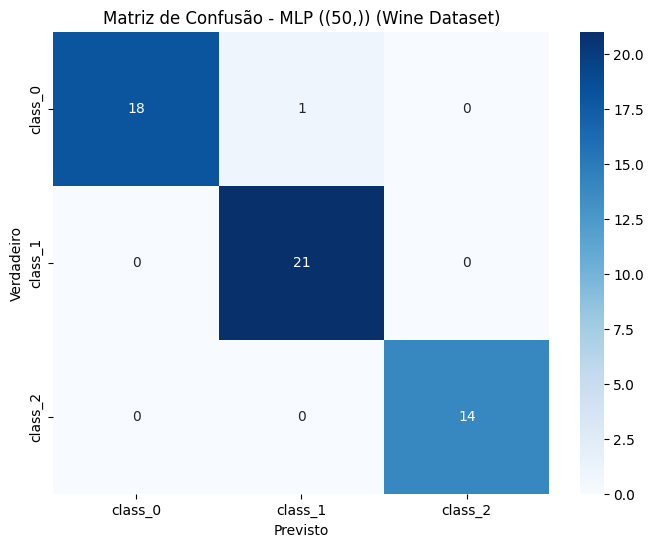


MLP com hidden_layer_sizes: (100,)
Acurácia do MLP: 0.9814814814814815


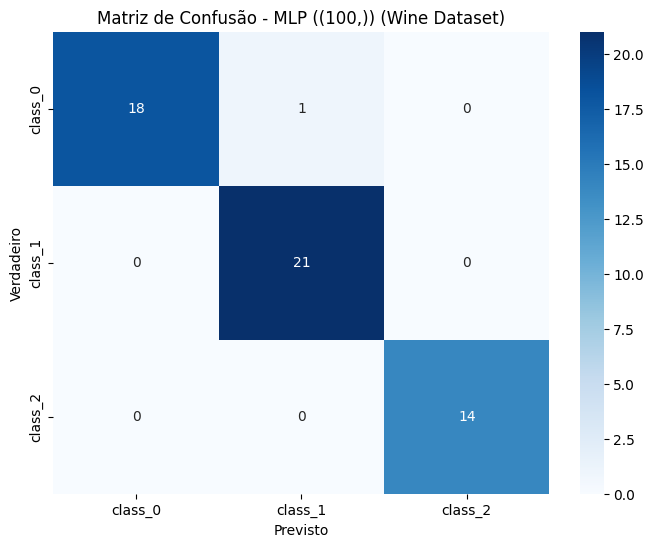


MLP com hidden_layer_sizes: (50, 25)
Acurácia do MLP: 0.5925925925925926


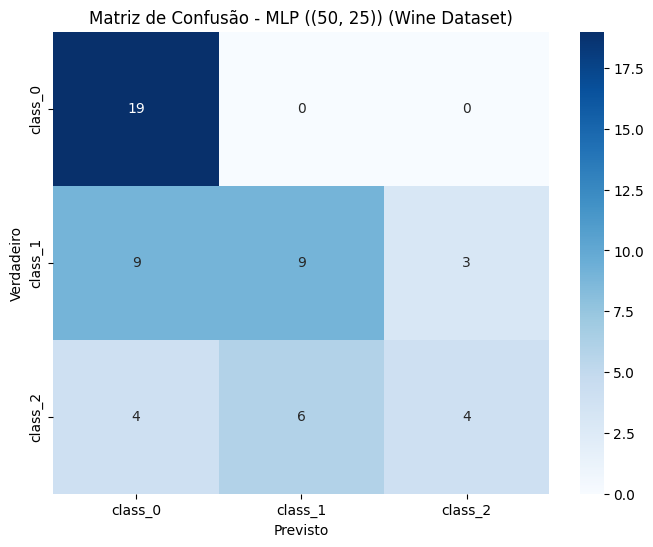


MLP com hidden_layer_sizes: (100, 50)
Acurácia do MLP: 0.9629629629629629


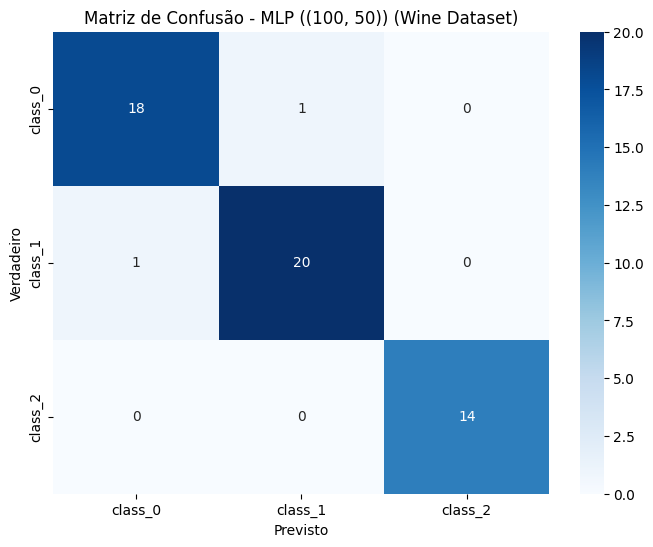

----------------------------------------


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import numpy as np

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("--- Aplicando Perceptron ao Wine Dataset ---")

perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)

y_pred_perceptron = perceptron.predict(X_test)

accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print(f"Acurácia do Perceptron: {accuracy_perceptron}")

cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Perceptron (Wine Dataset)')
plt.show()

print("-" * 40)

print("--- Aplicando MLP ao Wine Dataset ---")


hidden_layer_configs = [(50,), (100,), (50, 25), (100, 50)]

for config in hidden_layer_configs:
    print(f"\nMLP com hidden_layer_sizes: {config}")

    mlp = MLPClassifier(hidden_layer_sizes=config, max_iter=10000, random_state=42)
    mlp.fit(X_train, y_train)

    y_pred_mlp = mlp.predict(X_test)

    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
    print(f"Acurácia do MLP: {accuracy_mlp}")

    cm_mlp = confusion_matrix(y_test, y_pred_mlp)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - MLP ({config}) (Wine Dataset)')
    plt.show()

print("-" * 40)